In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams.update({'font.size': 18}) # Set global font size to 12, adjust as needed

In [2]:
!pip install openpyxl

In [3]:
# Load the data from the Excel file
file_path = './Research Park Electricity bills.xlsx'
research_park_consumption = pd.read_excel(file_path)

# Clean and prepare the data for plotting
research_park_consumption.columns = research_park_consumption.iloc[0]  # Set the first row as the header
research_park_consumption = research_park_consumption.drop(0)  # Drop the header row from the dataframe

# Convert 'Date' column to datetime, keeping the first date in the range for simplicity
research_park_consumption['Date'] = pd.to_datetime(research_park_consumption['Date'].str.extract(r'(.*?)-')[0] + ', ' + research_park_consumption['Date'].str[-4:], errors='coerce')
#research_park_consumption['Month'] = pd.to_datetime(research_park_consumption['Month'].str.extract(r'(.*?)-')[0] + ', ' + research_park_consumption['Date'].str[-4:], errors='coerce')
research_park_consumption['Month'] = research_park_consumption['Month'].map(str)

# Convert 'Consumption', 'Cost (no GST)', and 'Average Cost per kw/h' to numeric
research_park_consumption['Consumption'] = pd.to_numeric(research_park_consumption['Consumption'], errors='coerce')
research_park_consumption['Cost (no GST)'] = pd.to_numeric(research_park_consumption['Cost (no GST)'], errors='coerce')
research_park_consumption['Average Cost per kw/h'] = pd.to_numeric(research_park_consumption['Average Cost per kw/h'], errors='coerce')
research_park_consumption['Avg'] = pd.to_numeric(research_park_consumption['Avg'], errors='coerce')

# Drop rows with missing dates
research_park_consumption = research_park_consumption.dropna(subset=['Date'])

print(research_park_consumption)
#print("\nMax Monthly Consumption: "+str(max(research_park_consumption['Consumption']))+" kWh")
daily_max_consumption = max(research_park_consumption['Consumption'])/30
#print("Max daily consumption based on max monthly: "+str(daily_max_consumption)+" kWh")

0        Date  Consumption  Cost (no GST)  Average Cost per kw/h Month  \
1  2019-05-01        60151       13252.72                  0.305   Jan   
2  2019-06-01        76922       16752.32                  0.230   Feb   
3  2019-07-01       117715       25435.23                  0.210   Mar   
4  2019-08-01        93960       14409.09                  0.155   Apr   
5  2019-09-01        66786       16107.83                  0.285   May   
6  2019-10-01       212701       45988.60                  0.215   Jun   
7  2019-11-01       169746       27271.24                  0.160   Jul   
8  2019-12-01        51563       10145.83                  0.460   Aug   
9  2020-01-01        57396       11696.75                  0.420   Sep   
10 2020-02-01        49893       11405.72                  0.975   Oct   
11 2020-03-01        57474       12381.14                  0.370   Nov   
12 2020-04-01        42157        8984.81                  0.885   Dec   
13 2020-05-01        64260       14479

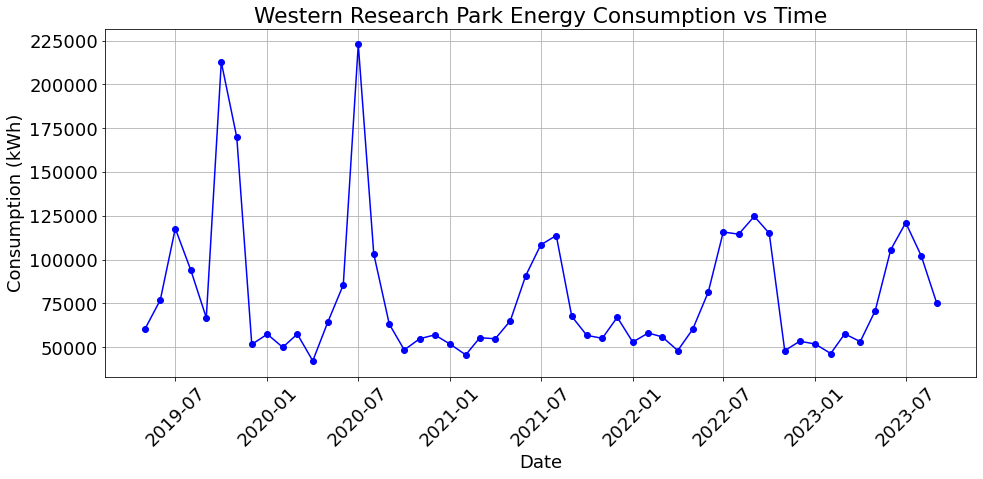

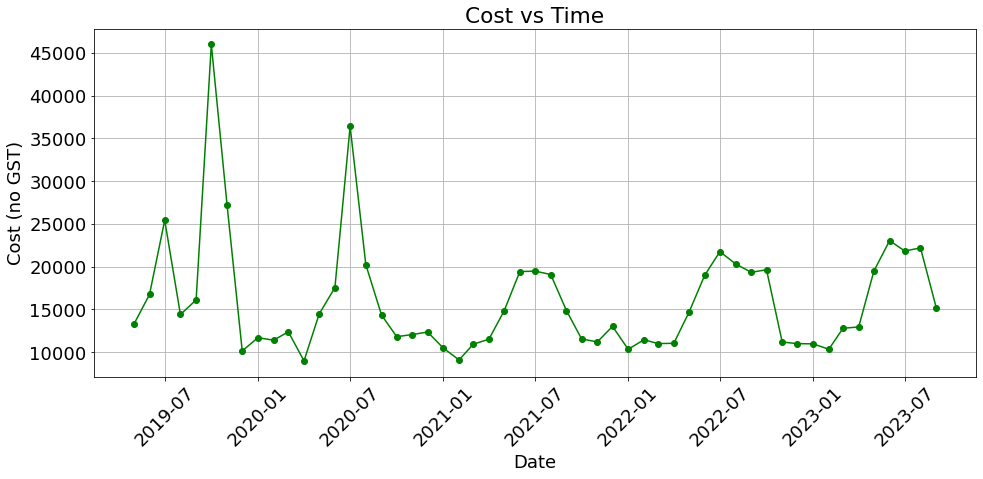

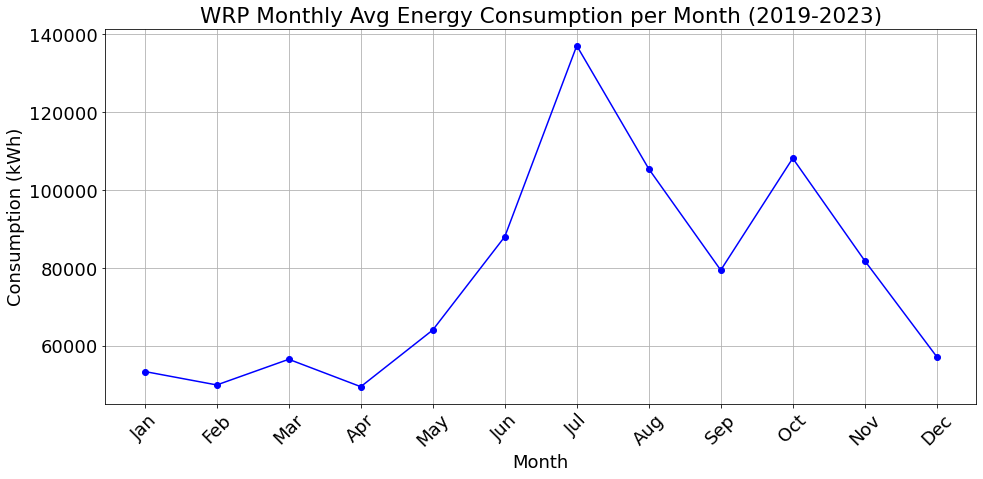

In [4]:


# Plot energy consumption vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Consumption'], marker='o', linestyle='-', color='blue')
plt.title('Western Research Park Energy Consumption vs Time')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot cost vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Date'], research_park_consumption['Cost (no GST)'], marker='o', linestyle='-', color='green')
plt.title('Cost vs Time')
plt.xlabel('Date')
plt.ylabel('Cost (no GST)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

# Plot average cost vs time
#plt.figure(figsize=(14, 7))
#plt.plot(research_park_consumption['Date'], research_park_consumption['Average Cost per kw/h'], marker='o', linestyle='-', color='red')
#plt.title('Average Cost per kWh vs Time')
#plt.xlabel('Date')
#plt.ylabel('Average Cost per kWh')
#plt.grid(True)
#plt.xticks(rotation=45)
#plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
#plt.show()

# Plot energy consumption vs time
plt.figure(figsize=(14, 7))
plt.plot(research_park_consumption['Month'], research_park_consumption['Avg'], marker='o', linestyle='-', color='blue')
plt.title('WRP Monthly Avg Energy Consumption per Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
plt.show()

## NOTE: This script does not include panel degradation

## Consumption vs Generation

In [14]:
PV = 0.575 # [kW]
mH = [66,92,109,115,119,124,125,118,104,85,56,52] #monthly generation hours Jan - Dec
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # used for plotting
roofA = 2381+2349 # surface area of rooftop
parking1 = 2215 # parking lot configuration
parking2 = 2215+4615
parking3 = 4089+2215+4615
parking4 = 7891+2215+4615
parking5 = 7891+2215+4615+4089

'''
For dynamic model:
Have a surface area input then add configurations for both more or less surface area based on a certain step size
Total surface area for WRP is 23,540 [m^2]
'''

genArea = [roofA,roofA+parking1,roofA+parking2,roofA+parking3,roofA+parking4,roofA+parking5] #combinations of rooftop and parking lot areas
pArea = 2.278 * 1.134 # solar panel surface area [m^2] https://cansolarcorp.com/solar-modules/bauer-premium-protect-topcon/
numPanels = [i * 0.8 / pArea for i in genArea] # number of panels (unrounded)

gen = [i * PV for i in numPanels] # generation for each surface area configuration [kW]

totGen1 = [i * gen[0] for i in mH] # generation for surface area configuration 1 for each mounth [kWh]
totGen2 = [i * gen[1] for i in mH] # generation for surface area configuration 2 for each mounth [kWh]
totGen3 = [i * gen[2] for i in mH] # generation for surface area configuration 3 for each mounth [kWh]
totGen4 = [i * gen[3] for i in mH] # generation for surface area configuration 4 for each mounth [kWh] 
totGen5 = [i * gen[4] for i in mH] # generation for surface area configuration 5 for each mounth [kWh]
totGen6 = [i * gen[5] for i in mH] # generation for surface area configuration 5 for each mounth [kWh]

wrp = [53426.50,49977.50,56568.00,49531.75,64092.80,88062.40,137115.60,105491.40,79462.60,108207.75,81892.25,57238.75] # average power consumption for the WRP from excel file

diff1 = np.subtract(totGen1,wrp) # power difference between generation and consumption
diff2 = np.subtract(totGen2,wrp)
diff3 = np.subtract(totGen3,wrp)
diff4 = np.subtract(totGen4,wrp)
diff5 = np.subtract(totGen5,wrp)
diff6 = np.subtract(totGen6,wrp)

print(gen) # print configuration sizes
print(sum(totGen1))

[842.2716792631923, 1236.6970005249198, 2058.490615704546, 2786.619346467166, 3463.6419520821046, 4191.770682844724]
981246.506341619


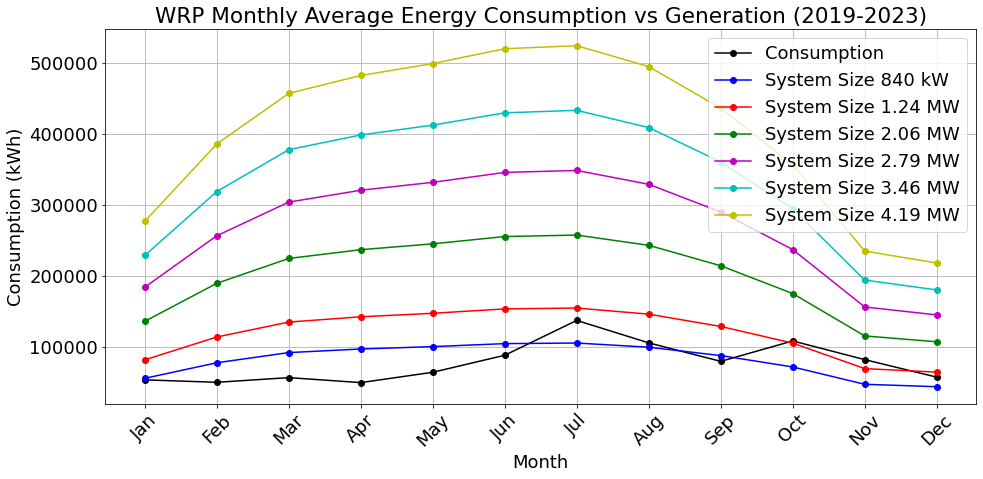

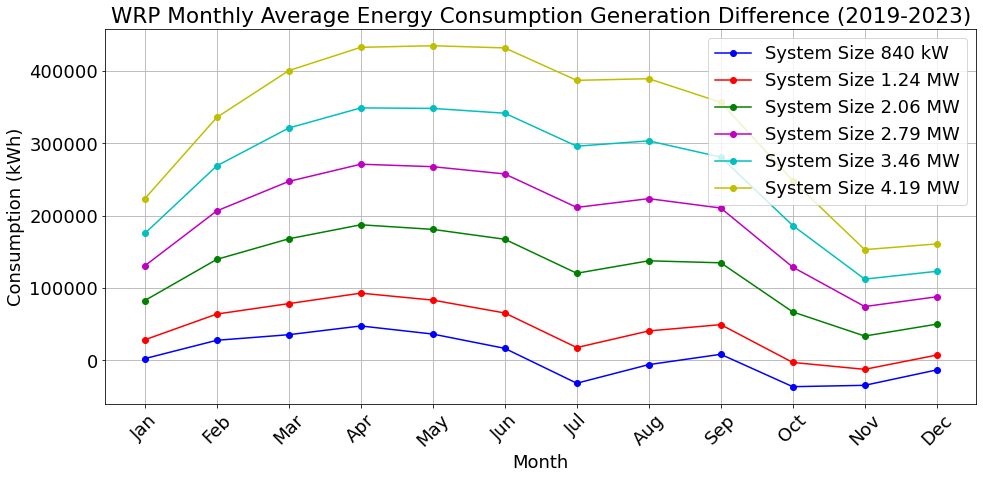

In [6]:
#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption vs Generation (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(research_park_consumption['Month'], research_park_consumption['Avg'], marker='o', linestyle='-', color='k', label='Consumption')
ax1.plot(months, totGen1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, totGen2, marker='o', linestyle='-', color='r', label='System Size 1.24 MW')
ax1.plot(months, totGen3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')
ax1.plot(months, totGen4, marker='o', linestyle='-', color='m', label='System Size 2.79 MW')
ax1.plot(months, totGen5, marker='o', linestyle='-', color='c', label='System Size 3.46 MW')
ax1.plot(months, totGen6, marker='o', linestyle='-', color='y', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#Plot of the difference between the power generated for each configuration to the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption Generation Difference (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, diff1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, diff2, marker='o', linestyle='-', color='r', label='System Size 1.24 MW')
ax1.plot(months, diff3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')
ax1.plot(months, diff4, marker='o', linestyle='-', color='m', label='System Size 2.79 MW')
ax1.plot(months, diff5, marker='o', linestyle='-', color='c', label='System Size 3.46 MW')
ax1.plot(months, diff6, marker='o', linestyle='-', color='y', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## Costs vs Revenue

In [7]:
projLife = 30 # project lifespan in years
costSol = 450 # approximate $/kW per CANSOLAR
costRoof = 300 # approximate $/kW per Hayter Group
costCarport = costRoof * 10 # approximate $/kW per Hayter Group
bat = 2789692.15 # cost of Tesla Megapack in CAD
trans = 388416.66 # https://www.larsonelectronics.com/product/282374/5-mva-pad-mount-transformer-480v-delta-primary-21600y-12470-grounded-wye-secondary-knan-bell-green?utm_campaign=20417422929&utm_source=google&utm_medium=cpc&utm_content=&keyword=&adgroupid=&gad_source=1&gclid=Cj0KCQiAxOauBhCaARIsAEbUSQTmYmdHeF33ObE_SgbDpLif5siC51MRq3I2RXI3Mlt_F6e2AvHPcPkaAg3wEALw_wcB


costInstRoof = costRoof * gen[0] # cost of installation for just rooftop of WRP
costInstCarport1 = costCarport * (gen[1]-gen[0]) # cost of installation for rooftop and parking lots of WRP
costInstCarport2 = costCarport * (gen[2]-gen[0])
costInstCarport3 = costCarport * (gen[3]-gen[0])
costInstCarport4 = costCarport * (gen[4]-gen[0])
costInstCarport5 = costCarport * (gen[5]-gen[0])

totCost1 = gen[0] * costSol + costInstRoof + trans
totCost2 = gen[1] * costSol + costInstRoof + costInstCarport1 + trans
totCost3 = gen[2] * costSol + costInstRoof + costInstCarport2 + trans
totCost4 = gen[3] * costSol + costInstRoof + costInstCarport3 + trans
totCost5 = gen[4] * costSol + costInstRoof + costInstCarport4 + trans
totCost6 = gen[5] * costSol + costInstRoof + costInstCarport5 + trans

totCost = [totCost1,totCost2,totCost3,totCost4,totCost5,totCost6] # approx cost of panels for each surface area configuration [$CAD] without batteries
config = [0.84,1.24,2.06,2.79,3.46,4.19] # list of configuration sizes
buyback = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh

newCost = [i + bat for i in totCost] # approx cost of panels for each surface area configuration [$CAD] with batteries


surplusP = [sum(diff1),sum(diff2),sum(diff3),sum(diff4),sum(diff5),sum(diff6)] # surplus power for each configuration


elecCost = [10873,10576,11775,11125,15344,19156,24986,19252,15979,22249,15433,11630] # list of average monthly costs for the WRP
costKWH = [0.45,0.61,0.38,0.55,0.29,0.22,0.18,0.17,0.23,0.31,0.40,0.36] # list of the monthly average $/kWh for the WRP

# Find the amount of savings on electricity costs for each month for each configuration
savings1 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(elecCost)):
    if diff1[i] >= 0:
        savings1[i] = [elecCost[i]]
    else:
        savings1[i] = [totGen1[i] * costKWH[i]]
save1 = [sum(idx) for idx in zip(*savings1)]

savings2 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(elecCost)):
    if diff2[i] >= 0:
        savings2[i] = [elecCost[i]]
    else:
        savings2[i] = [totGen2[i] * costKWH[i]]
save2 = [sum(idx) for idx in zip(*savings2)]

savings3 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(elecCost)):
    if diff3[i] >= 0:
        savings3[i] = [elecCost[i]]
    else:
        savings3[i] = [totGen3[i] * costKWH[i]]
save3 = [sum(idx) for idx in zip(*savings3)]

savings4 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(elecCost)):
    if diff4[i] >= 0:
        savings4[i] = [elecCost[i]]
    else:
        savings4[i] = [totGen4[i] * costKWH[i]]
save4 = [sum(idx) for idx in zip(*savings4)]

savings5 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(elecCost)):
    if diff5[i] >= 0:
        savings5[i] = [elecCost[i]]
    else:
        savings5[i] = [totGen5[i] * costKWH[i]]
save5 = [sum(idx) for idx in zip(*savings5)]

savings6 = [0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(elecCost)):
    if diff6[i] >= 0:
        savings6[i] = [elecCost[i]]
    else:
        savings6[i] = [totGen6[i] * costKWH[i]]
save6 = [sum(idx) for idx in zip(*savings6)]


#Amount of yearly revenue for each config based on the buyback pricing
rev1 = [i * surplusP[0] + save1 for i in buyback]
rev2 = [i * surplusP[1] + save2 for i in buyback]
rev3 = [i * surplusP[2] + save3 for i in buyback]
rev4 = [i * surplusP[3] + save4 for i in buyback]
rev5 = [i * surplusP[4] + save5 for i in buyback]
rev6 = [i * surplusP[5] + save6 for i in buyback]

#Payback period total cost of panels divided by revenue per year
payback1 = [totCost[0] / i for i in rev1]
payback2 = [totCost[1] / i for i in rev2]
payback3 = [totCost[2] / i for i in rev3]
payback4 = [totCost[3] / i for i in rev4]
payback5 = [totCost[4] / i for i in rev5]
payback6 = [totCost[5] / i for i in rev6]

#Payback period total cost of panels divided by revenue per year with batteries
newPayback1 = [newCost[0] / i for i in rev1]
newPayback2 = [newCost[1] / i for i in rev2]
newPayback3 = [newCost[2] / i for i in rev3]
newPayback4 = [newCost[3] / i for i in rev4]
newPayback5 = [newCost[4] / i for i in rev5]
newPayback6 = [newCost[5] / i for i in rev6]

#Find ROI = net return / cost of investments
ROI1 = [i*100*projLife/newCost[0] for i in rev1]
ROI2 = [i*100*projLife/newCost[1] for i in rev2]
ROI3 = [i*100*projLife/newCost[2] for i in rev3]
ROI4 = [i*100*projLife/newCost[3] for i in rev4]
ROI5 = [i*100*projLife/newCost[4] for i in rev5]
ROI6 = [i*100*projLife/newCost[5] for i in rev6]

'''
# Find IRR = (Future Value/Present Value)^(1/periods)-1
inv = [-newCost[0],-newCost[1],-newCost[2],-newCost[3],-newCost[4],-newCost[5]];

cashFlows1 = [[0]*projLife]*len(rev1)
for i in range(len(rev1)):
    for j in range(projLife):
        if(j==0):
            cashFlows1[i][j] = [inv[0]+rev1[i]];
        else:
            cashFlows1[i][j] = [rev1[i]];
print(cashFlows1)

cashFlows2 = [[0]*projLife]*len(rev2)
for i in range(len(rev2)):
    for j in range(projLife):
        if(j==0):
            cashFlows2[i][j] = [inv[1]+rev2[i]];
        else:
            cashFlows2[i][j] = [rev2[i]];

cashFlows3 = [[0]*projLife]*len(rev3)
for i in range(len(rev3)):
    for j in range(projLife):
        if(j==0):
            cashFlows3[i][j] = [inv[2]+rev3[i]];
        else:
            cashFlows3[i][j] = [rev3[i]];
        
cashFlows4 = [[0]*projLife]*len(rev4)
for i in range(len(rev4)):
    for j in range(projLife):
        if(j==0):
            cashFlows4[i][j] = [inv[3]+rev4[i]];
        else:
            cashFlows4[i][j] = [rev4[i]];
        
cashFlows5 = [[0]*projLife]*len(rev5)
for i in range(len(rev5)):
    for j in range(projLife):
        if(j==0):
            cashFlows5[i][j] = [inv[4]+rev5[i]];
        else:
            cashFlows5[i][j] = [rev5[i]];
        
cashFlows6 = [[0]*projLife]*len(rev6)
for i in range(len(rev6)):
    for j in range(projLife):
        if(j==0):
            cashFlows6[i][j] = [inv[5]+rev6[i]];
        else:
            cashFlows6[i][j] = [rev6[i]];

#print(cashFlows2)
#print(cashFlows1[0])

irr1 = [0]*len(rev1)
for i in range(len(cashFlows1)):
    #irr1[i] = round(np.irr(cashFlows1[0][i]),30);
    print(cashFlows1[0][i])


irr1 = round(np.irr(cashFlows1),4);
irr2 = round(np.irr(cashFlows2),4);
irr3 = round(np.irr(cashFlows3),4);
irr4 = round(np.irr(cashFlows4),4);
irr5 = round(np.irr(cashFlows5),4);
irr6 = round(np.irr(cashFlows6),4);

IRR = [irr1,irr2,irr3,irr4,irr5,irr6]

print("Internal rate of return:%3.4f"%irr1);
'''


'\n# Find IRR = (Future Value/Present Value)^(1/periods)-1\ninv = [-newCost[0],-newCost[1],-newCost[2],-newCost[3],-newCost[4],-newCost[5]];\n\ncashFlows1 = [[0]*projLife]*len(rev1)\nfor i in range(len(rev1)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows1[i][j] = [inv[0]+rev1[i]];\n        else:\n            cashFlows1[i][j] = [rev1[i]];\nprint(cashFlows1)\n\ncashFlows2 = [[0]*projLife]*len(rev2)\nfor i in range(len(rev2)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows2[i][j] = [inv[1]+rev2[i]];\n        else:\n            cashFlows2[i][j] = [rev2[i]];\n\ncashFlows3 = [[0]*projLife]*len(rev3)\nfor i in range(len(rev3)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows3[i][j] = [inv[2]+rev3[i]];\n        else:\n            cashFlows3[i][j] = [rev3[i]];\n        \ncashFlows4 = [[0]*projLife]*len(rev4)\nfor i in range(len(rev4)):\n    for j in range(projLife):\n        if(j==0):\n            cashFlows4[i][j] = 

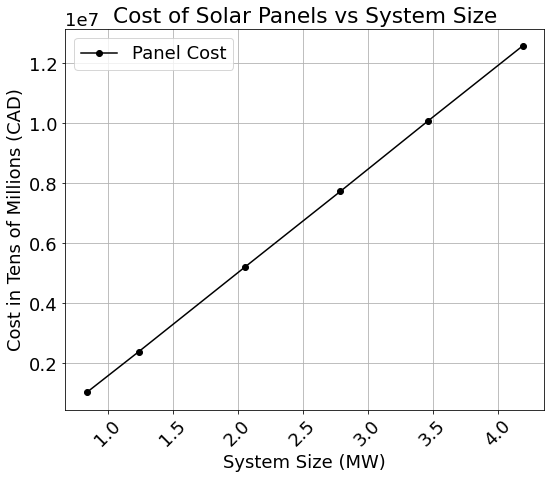

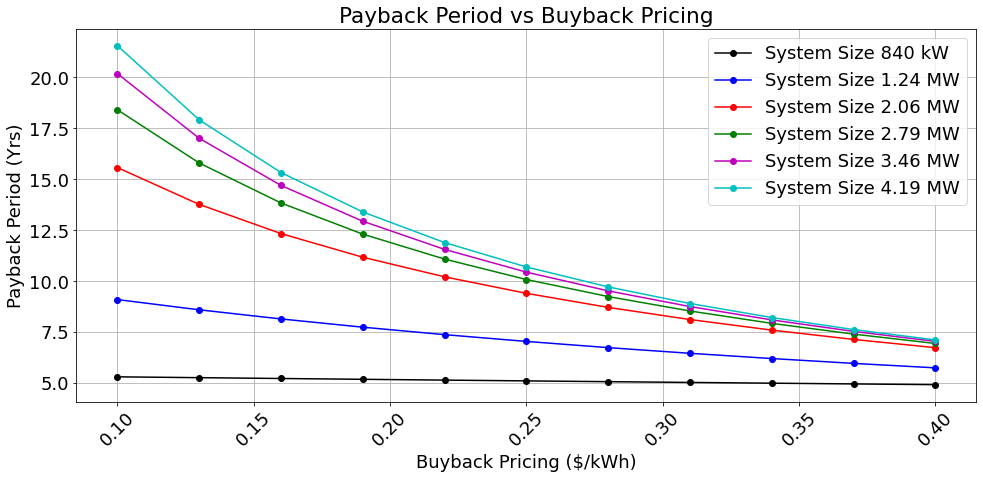

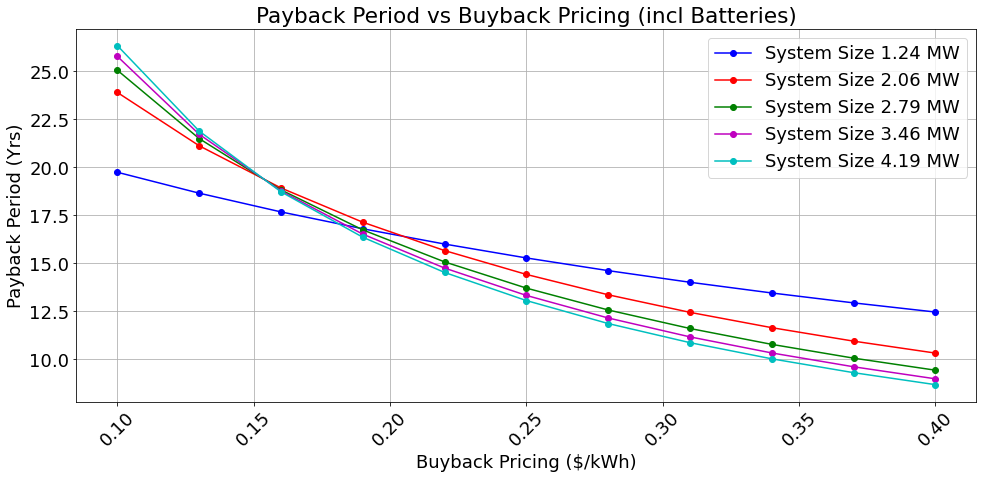

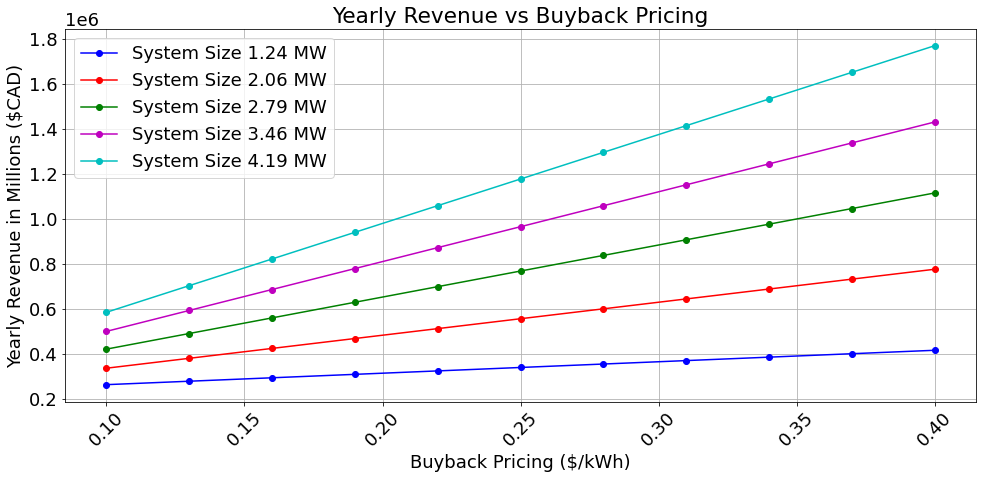

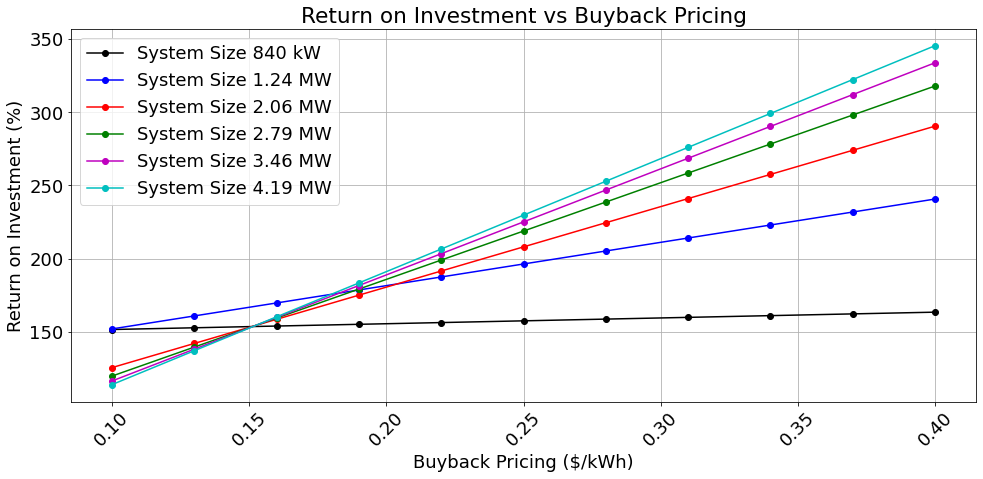

In [15]:
#Plot of the total cost of the solar panels for each configuration
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.title('Cost of Solar Panels vs System Size')
plt.xlabel('System Size (MW)')
plt.ylabel('Cost in Tens of Millions (CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(config, totCost, marker='o', linestyle='-', color='k', label='Panel Cost')

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, payback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, payback2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, payback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, payback4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, payback5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, payback6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (incl Batteries)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, newPayback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, newPayback2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, newPayback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, newPayback4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, newPayback5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, newPayback6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()




#Plot of the yearly revenue for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue in Millions ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

#ax1.plot(buyback, rev1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rev2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, rev3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, rev4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, rev5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, rev6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, ROI1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, ROI2, marker='o', linestyle='-', color='b', label='System Size 1.24 MW')
ax1.plot(buyback, ROI3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')
ax1.plot(buyback, ROI4, marker='o', linestyle='-', color='g', label='System Size 2.79 MW')
ax1.plot(buyback, ROI5, marker='o', linestyle='-', color='m', label='System Size 3.46 MW')
ax1.plot(buyback, ROI6, marker='o', linestyle='-', color='c', label='System Size 4.19 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Separate rooftop and parking lot cases

In [9]:
PV = 0.575 # [kW]
mH = [66,92,109,115,119,124,125,118,104,85,56,52] #monthly generation hours Jan - Dec
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # used for plotting
wrp = [53426.50,49977.50,56568.00,49531.75,64092.80,88062.40,137115.60,105491.40,79462.60,108207.75,81892.25,57238.75] # average power consumption for the WRP from excel file


roofA = 2381+2349 # rooftop configurations

# the two follow cases are just random values
roofB = 2381+2349+4615
roofC = 2381+2349+2215+4615

parking1 = 7891 # parking lot configurations
parking2 = 7891+2215
parking3 = 7891+2215+4615
parking4 = 7891+2215+4615+4089

'''
For dynamic model:
Have a surface area input then add configurations for both more or less surface area based on a certain step size
Total surface area for WRP is 23,540 [m^2]
'''

roofGen = [roofA,roofB,roofC] #combinations of rooftops

parkingGen = [parking1,parking2,parking3,parking4] #combinations of parking lots

panelArea = 2.278 * 1.134 # solar panel surface area [m^2] https://cansolarcorp.com/solar-modules/bauer-premium-protect-topcon/
roofPanels = [i * 0.8 / panelArea for i in roofGen] # number of panels on rooftop (unrounded)
parkingPanels = [i * 0.8 / panelArea for i in parkingGen] # number of panels in parking lots (unrounded)

rgen = [i * PV for i in roofPanels] # generation for each surface area configuration [kW]
pgen = [i * PV for i in parkingPanels] # generation for each surface area configuration [kW]

rtotGen1 = [i * rgen[0] for i in mH] # generation for rooftop configurations for each mounth [kWh]
rtotGen2 = [i * rgen[1] for i in mH]
rtotGen3 = [i * rgen[2] for i in mH]

ptotGen1 = [i * pgen[0] for i in mH] # generation for parking lot configurations for each mounth [kWh]
ptotGen2 = [i * pgen[1] for i in mH]
ptotGen3 = [i * pgen[2] for i in mH]
ptotGen4 = [i * pgen[3] for i in mH]

rdiff1 = np.subtract(rtotGen1,wrp) # power difference between generation and consumption
rdiff2 = np.subtract(rtotGen2,wrp)
rdiff3 = np.subtract(rtotGen3,wrp)

pdiff1 = np.subtract(ptotGen1,wrp)
pdiff2 = np.subtract(ptotGen2,wrp)
pdiff3 = np.subtract(ptotGen3,wrp)
pdiff4 = np.subtract(ptotGen4,wrp)

print(rgen) # print configuration sizes
print(pgen)

[842.2716792631923, 1664.0652944428186, 2058.490615704546]
[1405.1513363775582, 1799.5766576392855, 2621.3702728189123, 3349.499003581532]


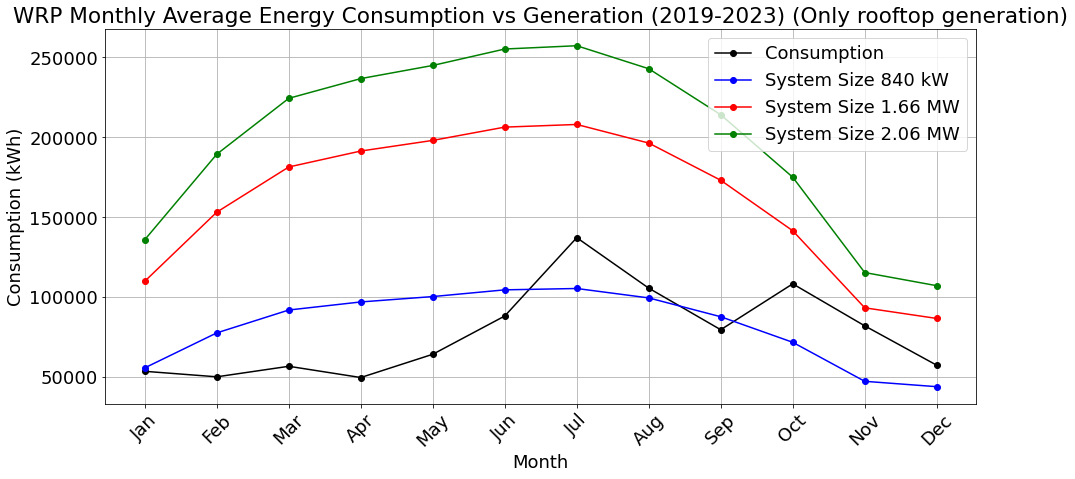

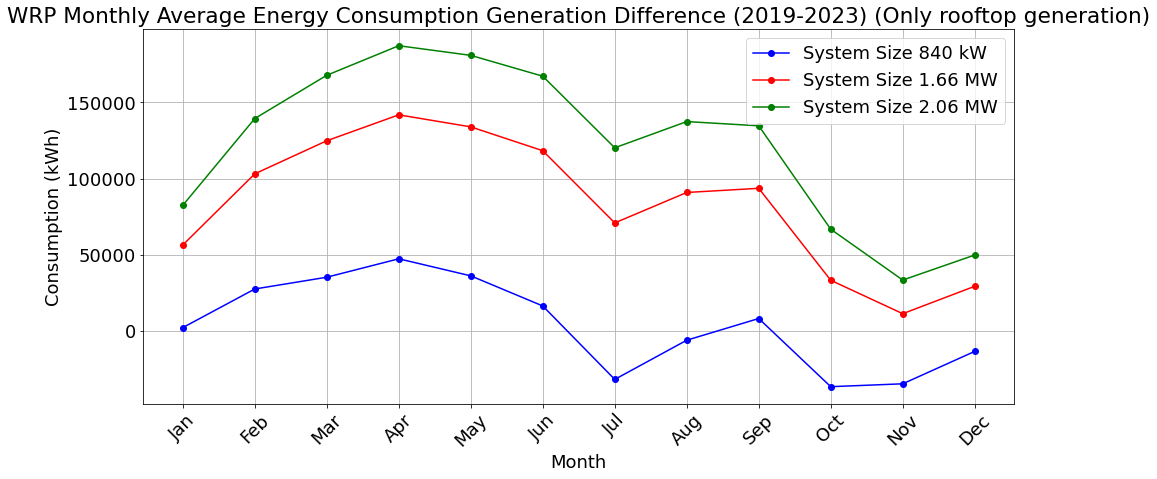

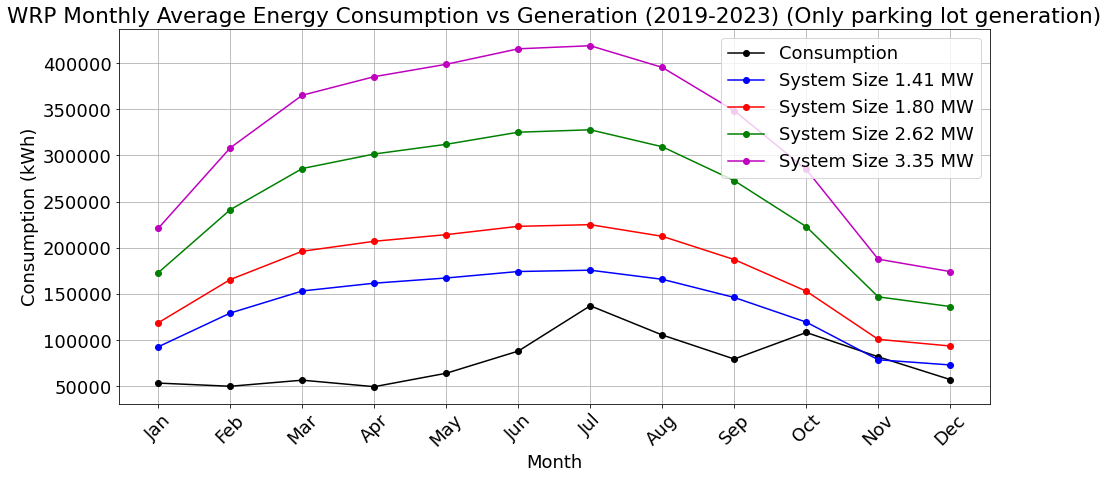

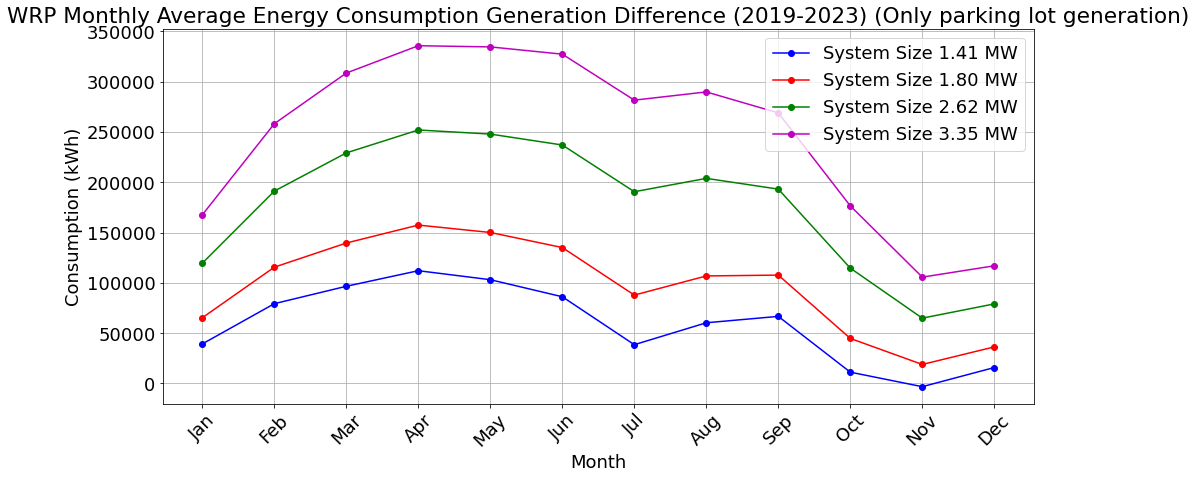

In [10]:
#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption vs Generation (2019-2023) (Only rooftop generation)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(research_park_consumption['Month'], research_park_consumption['Avg'], marker='o', linestyle='-', color='k', label='Consumption')
ax1.plot(months, rtotGen1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, rtotGen2, marker='o', linestyle='-', color='r', label='System Size 1.66 MW')
ax1.plot(months, rtotGen3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#Plot of the difference between the power generated for each configuration to the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption Generation Difference (2019-2023) (Only rooftop generation)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, rdiff1, marker='o', linestyle='-', color='b', label='System Size 840 kW')
ax1.plot(months, rdiff2, marker='o', linestyle='-', color='r', label='System Size 1.66 MW')
ax1.plot(months, rdiff3, marker='o', linestyle='-', color='g', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



#Plot of the power generated for each configuration and the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption vs Generation (2019-2023) (Only parking lot generation)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(research_park_consumption['Month'], research_park_consumption['Avg'], marker='o', linestyle='-', color='k', label='Consumption')
ax1.plot(months, ptotGen1, marker='o', linestyle='-', color='b', label='System Size 1.41 MW')
ax1.plot(months, ptotGen2, marker='o', linestyle='-', color='r', label='System Size 1.80 MW')
ax1.plot(months, ptotGen3, marker='o', linestyle='-', color='g', label='System Size 2.62 MW')
ax1.plot(months, ptotGen4, marker='o', linestyle='-', color='m', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#Plot of the difference between the power generated for each configuration to the power consumption of the WRP
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('WRP Monthly Average Energy Consumption Generation Difference (2019-2023) (Only parking lot generation)')
plt.xlabel('Month')
plt.ylabel('Consumption (kWh)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(months, pdiff1, marker='o', linestyle='-', color='b', label='System Size 1.41 MW')
ax1.plot(months, pdiff2, marker='o', linestyle='-', color='r', label='System Size 1.80 MW')
ax1.plot(months, pdiff3, marker='o', linestyle='-', color='g', label='System Size 2.62 MW')
ax1.plot(months, pdiff4, marker='o', linestyle='-', color='m', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [11]:
projLife = 30 # project lifespan in years
costSol = 450 # approximate $/kW per CANSOLAR
costRoof = 300 # approximate $/kW per Hayter Group
costCarport = costRoof * 10 # approximate $/kW per Hayter Group (OPSUN state 1570 as top of range but that does not include foundation and installation only engineering design)
bat = 2789692.15 # cost of Tesla Megapack in CAD
trans = 388416.66 # https://www.larsonelectronics.com/product/282374/5-mva-pad-mount-transformer-480v-delta-primary-21600y-12470-grounded-wye-secondary-knan-bell-green?utm_campaign=20417422929&utm_source=google&utm_medium=cpc&utm_content=&keyword=&adgroupid=&gad_source=1&gclid=Cj0KCQiAxOauBhCaARIsAEbUSQTmYmdHeF33ObE_SgbDpLif5siC51MRq3I2RXI3Mlt_F6e2AvHPcPkaAg3wEALw_wcB
buyback = [0.1,0.13,0.16,0.19,0.22,0.25,0.28,0.31,0.34,0.37,0.4] # range of buyback pricing from 10 c/kWh to 40 c/kWh
elecCost = [10873,10576,11775,11125,15344,19156,24986,19252,15979,22249,15433,11630] # list of average monthly costs for the WRP
costKWH = [0.45,0.61,0.38,0.55,0.29,0.22,0.18,0.17,0.23,0.31,0.40,0.36] # list of the monthly average $/kWh for the WRP


costRoofSys = [i * (costRoof+costSol) + trans  for i in rgen] # cost of installation for just rooftop of WRP
costCarportSys = [i * (costCarport+costSol) + trans  for i in pgen] # cost of installation for rooftop and parking lots of WRP

rsurplus = [sum(rdiff1),sum(rdiff2),sum(rdiff3)] # surplus power for each configuration
psurplus = [sum(pdiff1),sum(pdiff2),sum(pdiff3),sum(pdiff4)] # surplus power for each configuration


# Find the amount of savings on electricity costs for each month for each rooftop configuration
rsavings1 = [0]*12
for i in range(len(elecCost)):
    if rdiff1[i] >= 0:
        rsavings1[i] = [elecCost[i]]
    else:
        rsavings1[i] = [rtotGen1[i] * costKWH[i]]
rsave1 = [sum(idx) for idx in zip(*rsavings1)]

rsavings2 = [0]*12
for i in range(len(elecCost)):
    if rdiff2[i] >= 0:
        rsavings2[i] = [elecCost[i]]
    else:
        rsavings2[i] = [rtotGen2[i] * costKWH[i]]
rsave2 = [sum(idx) for idx in zip(*rsavings2)]

rsavings3 = [0]*12
for i in range(len(elecCost)):
    if rdiff3[i] >= 0:
        rsavings3[i] = [elecCost[i]]
    else:
        rsavings3[i] = [rtotGen3[i] * costKWH[i]]
rsave3 = [sum(idx) for idx in zip(*rsavings3)]




# Find the amount of savings on electricity costs for each month for each parking lot configuration
psavings1 = [0]*12
for i in range(len(elecCost)):
    if pdiff1[i] >= 0:
        psavings1[i] = [elecCost[i]]
    else:
        psavings1[i] = [ptotGen1[i] * costKWH[i]]
psave1 = [sum(idx) for idx in zip(*psavings1)]

psavings2 = [0]*12
for i in range(len(elecCost)):
    if pdiff2[i] >= 0:
        psavings2[i] = [elecCost[i]]
    else:
        psavings2[i] = [ptotGen2[i] * costKWH[i]]
psave2 = [sum(idx) for idx in zip(*psavings2)]

psavings3 = [0]*12
for i in range(len(elecCost)):
    if pdiff3[i] >= 0:
        psavings3[i] = [elecCost[i]]
    else:
        psavings3[i] = [ptotGen3[i] * costKWH[i]]
psave3 = [sum(idx) for idx in zip(*psavings3)]

psavings4 = [0]*12
for i in range(len(elecCost)):
    if pdiff4[i] >= 0:
        psavings4[i] = [elecCost[i]]
    else:
        psavings4[i] = [ptotGen4[i] * costKWH[i]]
psave4 = [sum(idx) for idx in zip(*psavings4)]



#Amount of yearly revenue for each config based on the buyback pricing
rrev1 = [i * rsurplus[0] + rsave1 for i in buyback]
rrev2 = [i * rsurplus[1] + rsave2 for i in buyback]
rrev3 = [i * rsurplus[2] + rsave3 for i in buyback]

prev1 = [i * psurplus[0] + psave1 for i in buyback]
prev2 = [i * psurplus[1] + psave2 for i in buyback]
prev3 = [i * psurplus[2] + psave3 for i in buyback]
prev4 = [i * psurplus[3] + psave4 for i in buyback]

#Payback period total cost of panels divided by revenue per year
rpayback1 = [costRoofSys[0] / i for i in rrev1]
rpayback2 = [costRoofSys[1] / i for i in rrev2]
rpayback3 = [costRoofSys[2] / i for i in rrev3]

ppayback1 = [costCarportSys[0] / i for i in prev1]
ppayback2 = [costCarportSys[1] / i for i in prev2]
ppayback3 = [costCarportSys[2] / i for i in prev3]
ppayback4 = [costCarportSys[3] / i for i in prev4]


'''
#Payback period total cost of panels divided by revenue per year with batteries
newPayback1 = [newCost[0] / i for i in rev1]
newPayback2 = [newCost[1] / i for i in rev2]
newPayback3 = [newCost[2] / i for i in rev3]
newPayback4 = [newCost[3] / i for i in rev4]
newPayback5 = [newCost[4] / i for i in rev5]
newPayback6 = [newCost[5] / i for i in rev6]
'''



#Find ROI = net return / cost of investments
rROI1 = [i*100*projLife/costRoofSys[0] for i in rev1]
rROI2 = [i*100*projLife/costRoofSys[1] for i in rev2]
rROI3 = [i*100*projLife/costRoofSys[2] for i in rev3]

pROI1 = [i*100*projLife/costCarportSys[0] for i in prev1]
pROI2 = [i*100*projLife/costCarportSys[1] for i in prev2]
pROI3 = [i*100*projLife/costCarportSys[2] for i in prev3]
pROI4 = [i*100*projLife/costCarportSys[3] for i in prev4]

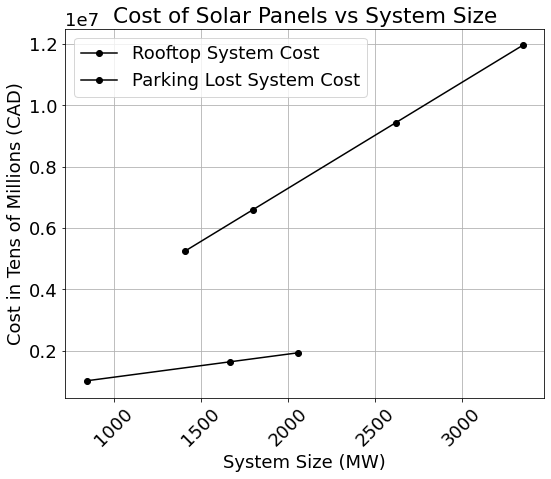

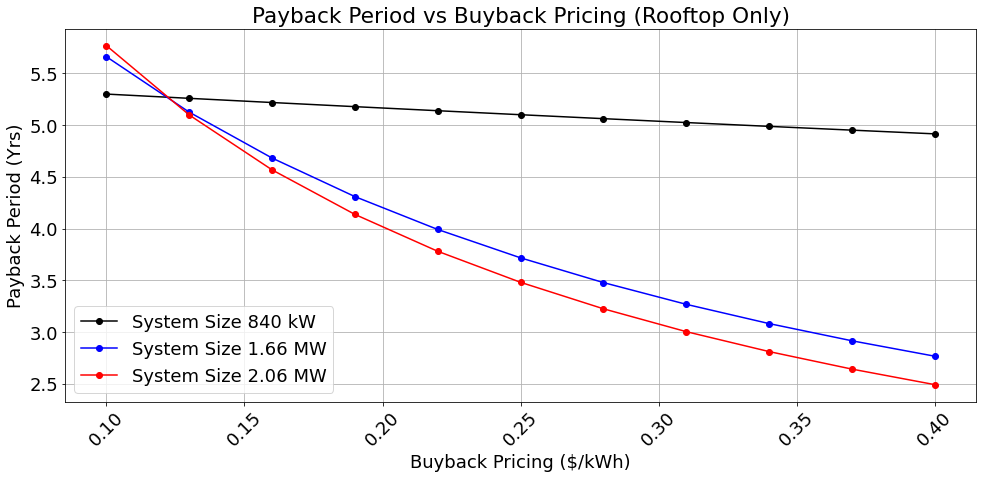

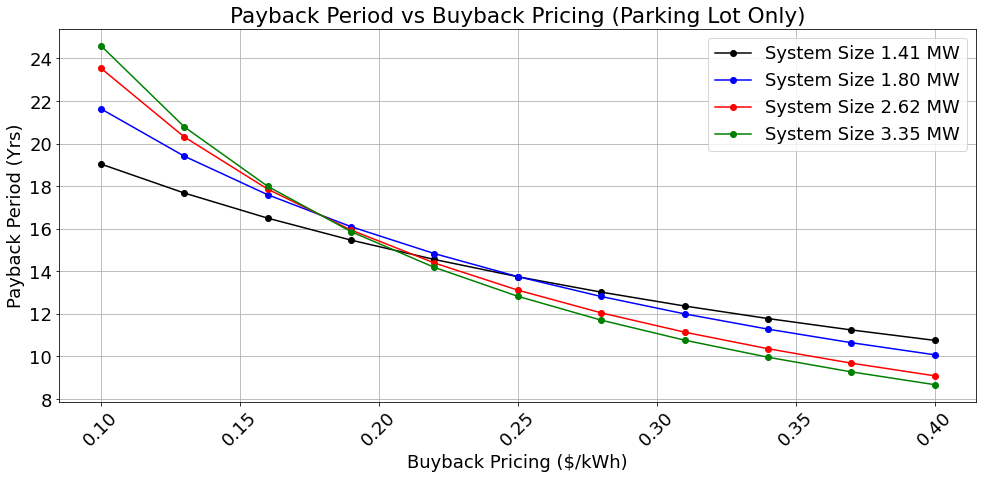

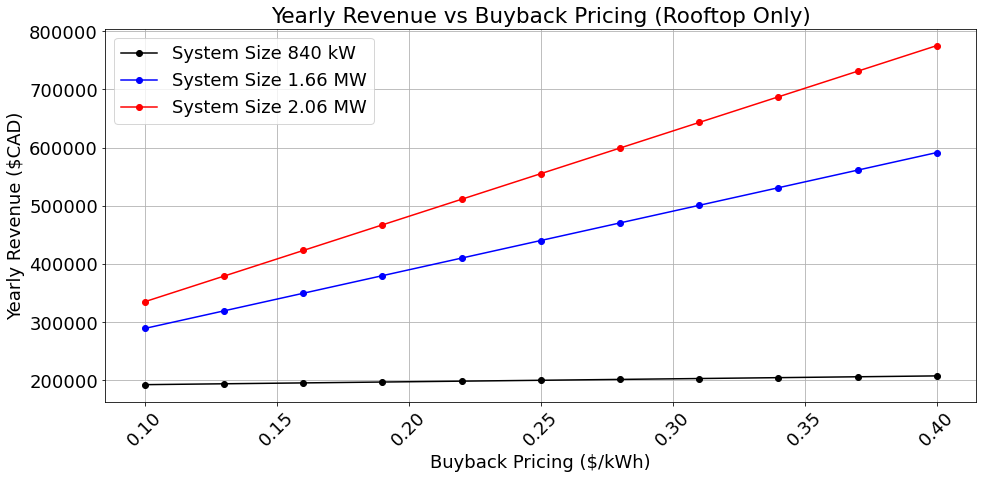

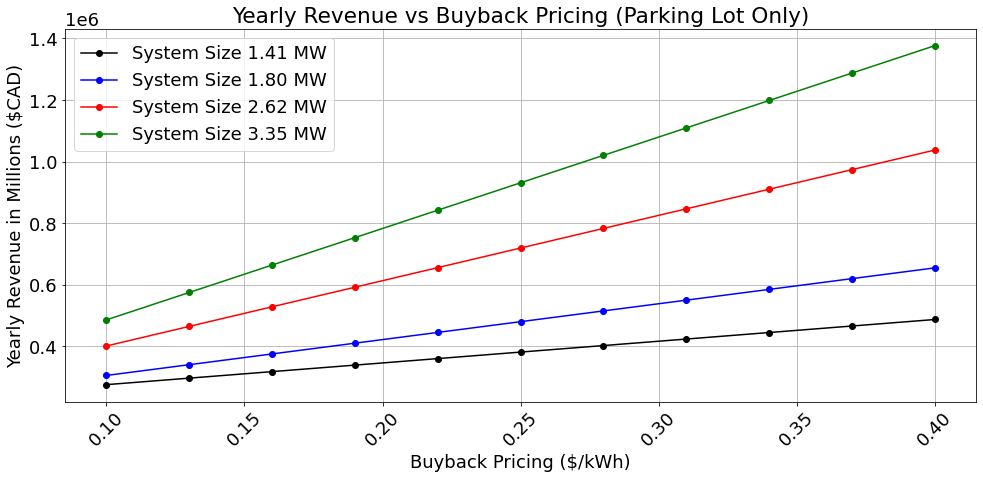

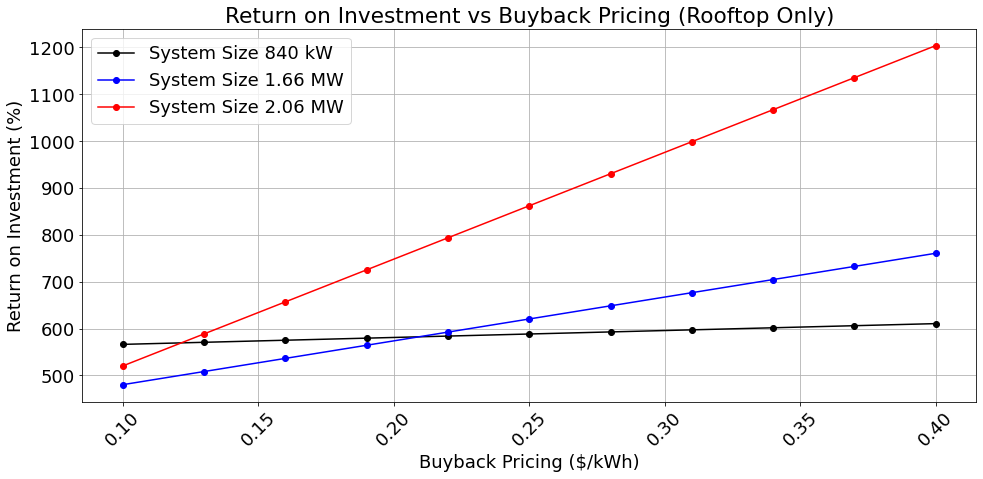

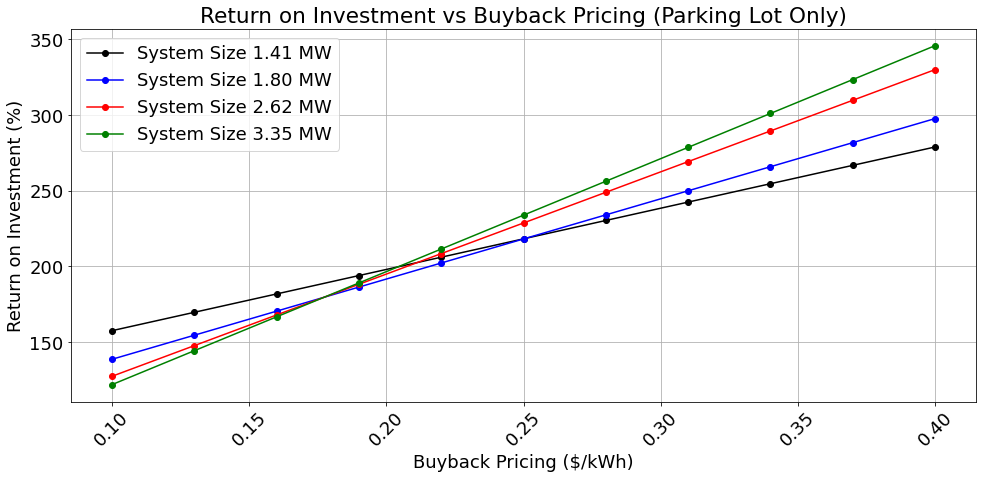

In [16]:
#Plot of the total cost of the solar panels for each configuration
fig, ax1 = plt.subplots(figsize=(8, 7))
plt.title('Cost of Solar Panels vs System Size')
plt.xlabel('System Size (MW)')
plt.ylabel('Cost in Tens of Millions (CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(rgen, costRoofSys, marker='o', linestyle='-', color='k', label='Rooftop System Cost')
ax1.plot(pgen, costCarportSys, marker='o', linestyle='-', color='k', label='Parking Lost System Cost')

plt.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (Rooftop Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rpayback1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rpayback2, marker='o', linestyle='-', color='b', label='System Size 1.66 MW')
ax1.plot(buyback, rpayback3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Payback Period vs Buyback Pricing (Parking Lot Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Payback Period (Yrs)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, ppayback1, marker='o', linestyle='-', color='k', label='System Size 1.41 MW')
ax1.plot(buyback, ppayback2, marker='o', linestyle='-', color='b', label='System Size 1.80 MW')
ax1.plot(buyback, ppayback3, marker='o', linestyle='-', color='r', label='System Size 2.62 MW')
ax1.plot(buyback, ppayback4, marker='o', linestyle='-', color='g', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()






#Plot of the yearly revenue for each configuration with batteries
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing (Rooftop Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rrev1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rrev2, marker='o', linestyle='-', color='b', label='System Size 1.66 MW')
ax1.plot(buyback, rrev3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Yearly Revenue vs Buyback Pricing (Parking Lot Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Yearly Revenue in Millions ($CAD)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, prev1, marker='o', linestyle='-', color='k', label='System Size 1.41 MW')
ax1.plot(buyback, prev2, marker='o', linestyle='-', color='b', label='System Size 1.80 MW')
ax1.plot(buyback, prev3, marker='o', linestyle='-', color='r', label='System Size 2.62 MW')
ax1.plot(buyback, prev4, marker='o', linestyle='-', color='g', label='System Size 3.35 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()





#Plot of the payback period in years for each configuration
fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing (Rooftop Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, rROI1, marker='o', linestyle='-', color='k', label='System Size 840 kW')
ax1.plot(buyback, rROI2, marker='o', linestyle='-', color='b', label='System Size 1.66 MW')
ax1.plot(buyback, rROI3, marker='o', linestyle='-', color='r', label='System Size 2.06 MW')

plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig, ax1 = plt.subplots(figsize=(14, 7))
plt.title('Return on Investment vs Buyback Pricing (Parking Lot Only)')
plt.xlabel('Buyback Pricing ($/kWh)')
plt.ylabel('Return on Investment (%)')
plt.xticks(rotation=45)
plt.grid(True)

ax1.plot(buyback, pROI1, marker='o', linestyle='-', color='k', label='System Size 1.41 MW')
ax1.plot(buyback, pROI2, marker='o', linestyle='-', color='b', label='System Size 1.80 MW')
ax1.plot(buyback, pROI3, marker='o', linestyle='-', color='r', label='System Size 2.62 MW')
ax1.plot(buyback, pROI4, marker='o', linestyle='-', color='g', label='System Size 3.35 MW')
plt.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()